<a href="https://colab.research.google.com/github/thinethwic/ai-clustring-model-agglomerativeclustering/blob/main/AgglomerativeClustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from google.colab import files

uploaded = files.upload();
filename = list(uploaded.keys())[0]

df = pd.read_csv(filename)
display(df.head())

Saving Iris.csv to Iris (2).csv


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [ ]:
df.isnull().sum()

,0
Id,0
SepalLengthCm,0
SepalWidthCm,0
PetalLengthCm,0
PetalWidthCm,0
Species,0


In [ ]:
#define x values
X = df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
display(X.head())

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


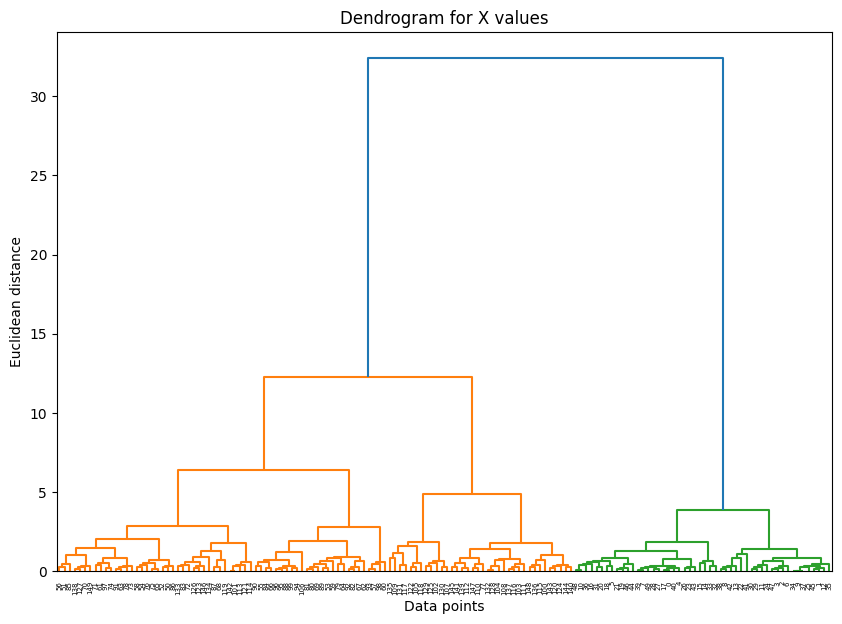

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

# Perform hierarchical clustering using Ward's method
linked = linkage(X, method='ward')

# Plot the dendrogram
plt.figure(figsize=(10, 7))
dendrogram(linked,
            orientation='top',
            distance_sort='descending',
            show_leaf_counts=True)
plt.title('Dendrogram for X values')
plt.xlabel('Data points')
plt.ylabel('Euclidean distance')
plt.show()

In [ ]:
from sklearn.cluster import AgglomerativeClustering

# Create a model with 3 clusters
model = AgglomerativeClustering(n_clusters=3, linkage='ward')

y_hc = model.fit_predict(X)

# Let's see the cluster assignments for the first 10 customers
print("Cluster assignments for the first 10 customers:")
print(y_hc[:10])

Cluster assignments for the first 10 customers:
[1 1 1 1 1 1 1 1 1 1]


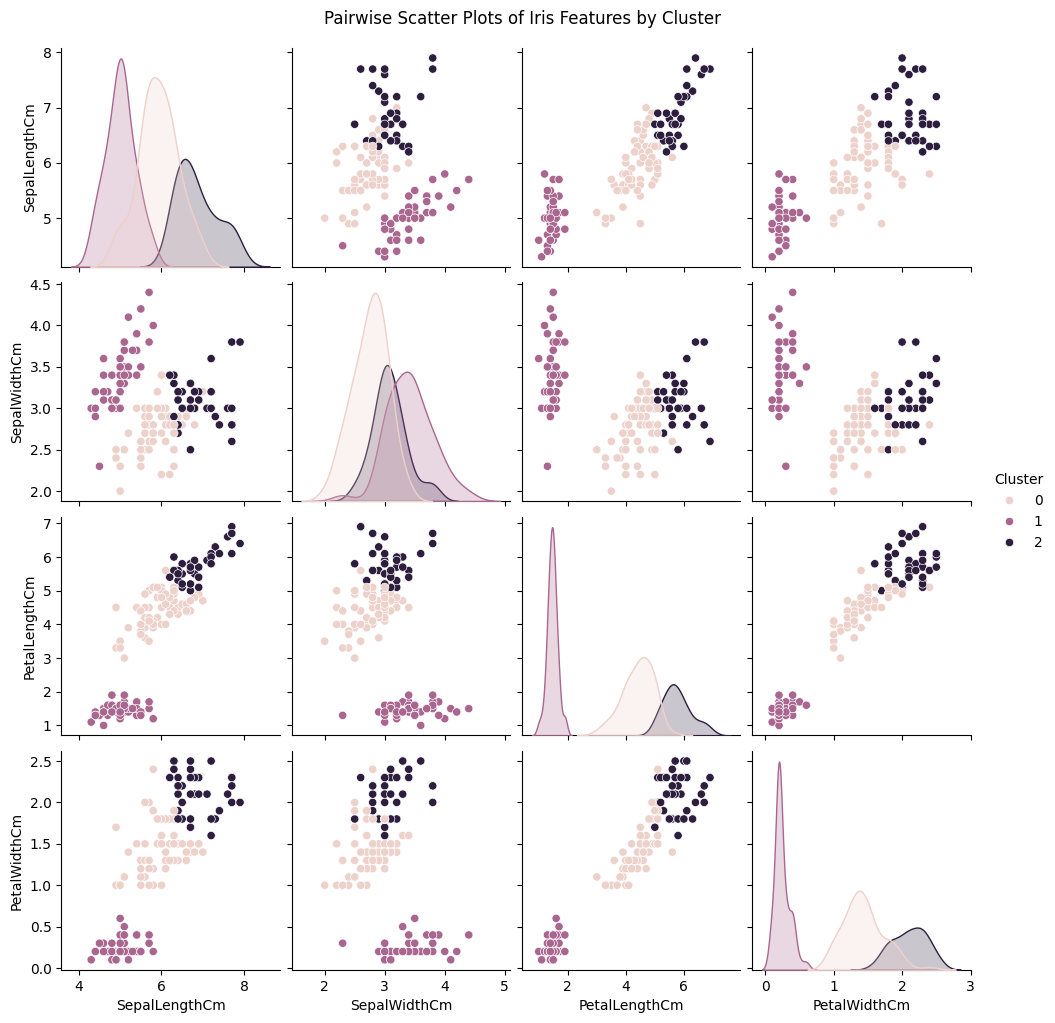

In [ ]:
# Add the cluster assignments to the original dataframe
df['Cluster'] = y_hc

# Visualize the clusters using scatter plots for pairs of features
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(df, hue='Cluster', vars=['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'])
plt.suptitle('Pairwise Scatter Plots of Iris Features by Cluster', y=1.02)
plt.show()

In [ ]:
import numpy as np
from scipy.spatial.distance import cdist

# Calculate the centroids of the clusters
cluster_centroids = df.groupby('Cluster')[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']].mean().values

# Create an inference function
def predict_cluster(new_data_point):
  """
  Infers the cluster for a new data point based on the closest centroid.

  Args:
    new_data_point: A numpy array or list containing the feature values
                    for the new data point (in the same order as the training data).

  Returns:
    The predicted cluster label (0, 1, or 2).
  """
  # Calculate the distance from the new data point to each cluster centroid
  distances = cdist([new_data_point], cluster_centroids, metric='euclidean')

  # Find the index of the closest centroid
  closest_cluster_index = np.argmin(distances)

  return closest_cluster_index

# Example usage:
# Assuming a new data point with specific feature values
new_iris = [5.5, 2.5, 4.0, 1.2]
predicted_cluster = predict_cluster(new_iris)
print(f"The new data point {new_iris} is predicted to belong to Cluster {predicted_cluster}")

The new data point [5.5, 2.5, 4.0, 1.2] is predicted to belong to Cluster 0
